In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('/content/DFORE125.csv')

In [7]:
df.shape

(365, 4)

In [8]:
df.head()

,client_account_id,MoB,Vends,uniqMcs
0,1500450,96,8939,11
1,2022131,96,874,4
2,1720039,96,362,7
3,1720281,42,234,5
4,2004281,10,2,1


In [9]:
pf = pd.read_csv('/content/DFORE115CSCGoas400.csv')

In [10]:
pf.head()

,as400id,account_name,machine_cnt,AS400ID,Region,Industry,IndustrySubType,LineOfBusiness,AvgAge,PropertyClass,NumLaundryRooms
0,1500450,CASA GRANDE VILLAGE,12,1500450,West,Multi-Housing,Apartments,Laundry Facilities,44.41,Class C,0.0
1,1501148,KNIGHTS INN,2,1501148,West,Hospitality Industry,Hotel/Motel/Inn,Laundry Facilities,NaN,Class C,1.0
2,1500654,SILVERSAGE POINT AT WESTERN CENTER,12,1500654,West,Multi-Housing,Apartments,Laundry Facilities,35.60,Class B,1.0
3,1421451,526 PARK STREET,4,1421451,East,Assisted Living,Housing Authority - Family,Laundry Facilities,42.48,NaN,NaN
4,1520123,CASA TREVINO APTS,8,1520123,West,Assisted Living,Housing Authority - Subsidized,Laundry Facilities,46.59,Class B,1.0


In [14]:
df1= df.merge(pf, left_on='client_account_id', right_on='AS400ID', how='inner')

In [15]:
df1.shape

(365, 15)

In [18]:
df1['VendsPerMcAge']= df1.Vends/(df1.machine_cnt*df1.MoB)

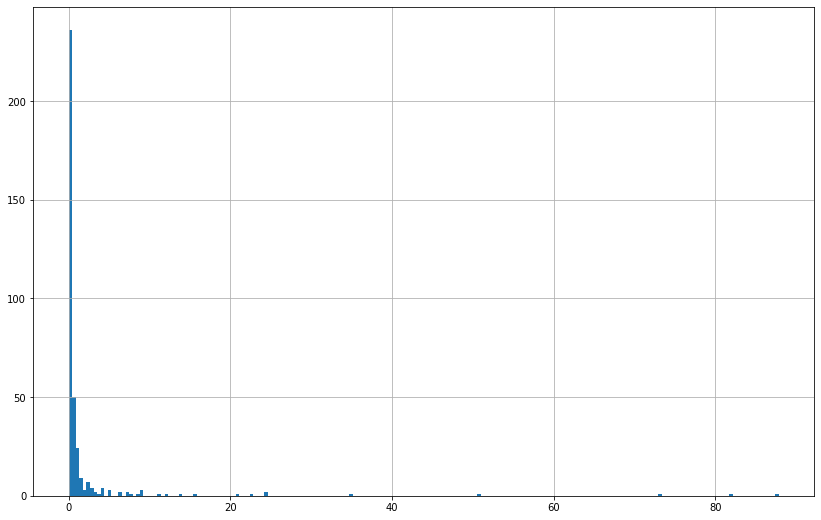

In [19]:
plt.figure(figsize=(14,9))
df1.VendsPerMcAge.hist(bins=200)

In [21]:
p75= df1.VendsPerMcAge.describe(percentiles=[.75, .95])['75%']

In [23]:
p75

0.7239583333333334

In [25]:
df2= df1.loc[df1.VendsPerMcAge <= p75]

In [27]:
df2.shape

(274, 16)

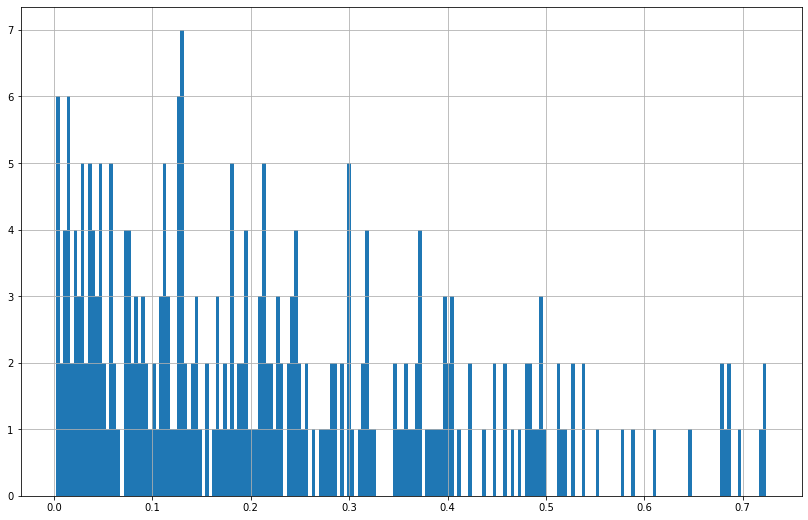

In [28]:
plt.figure(figsize=(14,9))
df2.VendsPerMcAge.hist(bins=200)

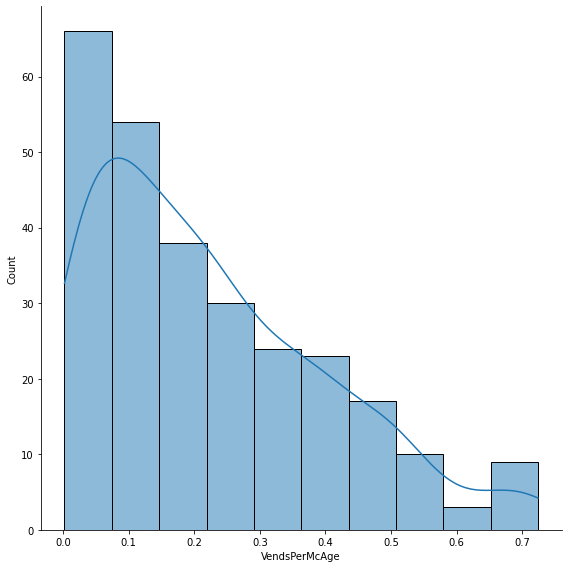

In [29]:
# fig, ax = plt.subplots(figsize=(12, 8))
sns.displot(df2.VendsPerMcAge, kde= True, height=8, aspect=1)

In [30]:
df3= pd.read_csv('/content/DFORE115CSCGoas400.csv')

In [33]:
df3.head()

,as400id,account_name,machine_cnt,AS400ID,Region,Industry,IndustrySubType,LineOfBusiness,AvgAge,PropertyClass,NumLaundryRooms
0,1500450,CASA GRANDE VILLAGE,12,1500450,West,Multi-Housing,Apartments,Laundry Facilities,44.41,Class C,0.0
1,1501148,KNIGHTS INN,2,1501148,West,Hospitality Industry,Hotel/Motel/Inn,Laundry Facilities,NaN,Class C,1.0
2,1500654,SILVERSAGE POINT AT WESTERN CENTER,12,1500654,West,Multi-Housing,Apartments,Laundry Facilities,35.60,Class B,1.0
3,1421451,526 PARK STREET,4,1421451,East,Assisted Living,Housing Authority - Family,Laundry Facilities,42.48,NaN,NaN
4,1520123,CASA TREVINO APTS,8,1520123,West,Assisted Living,Housing Authority - Subsidized,Laundry Facilities,46.59,Class B,1.0


In [36]:
MutiFamilyTarget= list(set(df3.as400id).difference(set(df1.client_account_id)))

In [47]:
MutiFamilyTarget= list(map(str, MutiFamilyTarget))

In [53]:
len(MutiFamilyTarget)

2139

In [35]:
MultiFamilyControl= list(set(df1.client_account_id))

In [48]:
MultiFamilyControl= list(map(str, MultiFamilyControl))

In [51]:
with open('MutiFamilyTarget.csv', 'w', encoding='utf-8') as f:
  write = csv.writer(f)
  for i in MutiFamilyTarget:
    write.writerow( [ i ] ) 

In [52]:
with open('MultiFamilyControl.csv', 'w', encoding='utf-8') as f:
  write = csv.writer(f)
  for i in MultiFamilyControl:
    write.writerow( [ i ] ) 

In [ ]:
shapiro_test = stats.shapiro(df1.VendsPerMcAge)
shapiro_test

(0.9507960677146912, 1.2624634848634742e-07)

In [ ]:
df1.head()

,client_account_id,MoB,Vends,uniqMcs,VendsPerMcAge
2,1720039,96,362,7,0.538690
4,2004281,10,2,1,0.200000
5,1700233,84,342,11,0.370130
6,1700901,84,373,8,0.555060
7,1520128,92,15,2,0.081522


In [ ]:
df5.dtypes

as400id              int64
account_name        object
machine_cnt          int64
AS400ID              int64
Region              object
Industry            object
IndustrySubType     object
LineOfBusiness      object
AvgAge             float64
PropertyClass       object
NumLaundryRooms    float64
dtype: object

In [ ]:
join(',').'test'*len(list(set(df5.as400id).difference(set(df1.client_account_id))))

SyntaxError: ignored

In [ ]:
list(set(df5.as400id).difference(set(df1.client_account_id)))

[4423680,
 4333570,
 4423687,
 4423695,
 7307279,
 4423702,
 1720349,
 3022884,
 7307301,
 7307302,
 4317229,
 729134,
 729133,
 729139,
 1720383,
 1720396,
 729167,
 1720403,
 3022931,
 4472929,
 1720419,
 1720420,
 1720421,
 1720423,
 7307370,
 1720427,
 1720431,
 729204,
 4472953,
 57467,
 57472,
 1720453,
 57482,
 32908,
 57488,
 3022993,
 2900118,
 4317334,
 3023004,
 57508,
 1720488,
 1720489,
 4333761,
 2711755,
 401618,
 1720535,
 1720536,
 4301025,
 4309223,
 4268267,
 4473069,
 1720560,
 1720565,
 4473084,
 4301055,
 1720577,
 4333825,
 2720004,
 2720006,
 2720008,
 2711829,
 1720609,
 1909031,
 1720638,
 4333897,
 4473161,
 4424023,
 1720665,
 1720666,
 1720668,
 1720671,
 1720680,
 16745,
 7307641,
 1720722,
 4473240,
 401867,
 2712017,
 6808017,
 2720211,
 401875,
 6210004,
 2712022,
 6620450,
 2712029,
 2720231,
 16885,
 2720255,
 3023370,
 7307795,
 2720280,
 2720283,
 2720291,
 2720303,
 4424255,
 16960,
 7307860,
 7307877,
 3007088,
 2720371,
 41617,
 4309654,
 4301469